<a href="https://colab.research.google.com/github/davidemeta/Progetto_Lab_Algoritmi/blob/main/davide_meta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduzione
In questo notebook, confronteremo due algoritmi di ordinamento: l'**Insertion Sort** e il **Counting Sort**.

* L'**Insertion Sort** è un algoritmo di ordinamento che costruisce l'array ordinato un elemento alla volta. È efficiente per insiemi di dati di piccole dimensioni.La sua complessità temporale è $O(n^2)$ nel caso medio e peggiore, e $O(n)$ nel caso migliore in cui l'array sia già ordinato.La sua complessità spaziale è $O(1)$, in quanto ordina l'array "in-place" (quantità costante di spazio di memoria aggiuntivo).
* Il **Counting Sort** è un algoritmo di ordinamento non basato sui confronti. Opera contando il numero di occorrenze di ciascun elemento con una chiave univoca all'interno di un certo intervallo. La sua complessità temporale è lineare, $O(n+k)$, dove 'n' è il numero di elementi e 'k' è l'intervallo dei valori in input.Tuttavia, richiede più memoria, con una complessità spaziale di $O(k)$.

L'obiettivo di questo laboratorio è analizzare e confrontare le prestazioni di questi due algoritmi in termini di tempo di esecuzione e di memoria utilizzata, al variare della dimensione dell'input.

Andiamo adesso a importare tutte le librerie necessarie per il corretto svolgimento della relazione

In [ ]:
#librerie necessarie per calcolare il tempo di esecuzione
import timeit
import random

#libreria per rappresentazione grafica
import matplotlib.pyplot as plt
import pandas as pd

#libreria necessaria per calcolare la quantità di memoria utilizzata
import tracemalloc

#Codice Insertion sort
Questo algoritmo è adatto per ordinare piccoli array o array quasi ordinati.  
Funziona costruendo l’array ordinato un elemento alla volta: ad ogni passo prende l’elemento successivo dalla parte non ordinata e lo inserisce nella posizione corretta all’interno della parte già ordinata.

In [ ]:
def insertion_sort(arr):

    for j in range(1, len(arr)):
        key = arr[j]
        i = j - 1
        while i >= 0 and arr[i] > key:
            arr[i + 1] = arr[i]
            i -= 1
        arr[i + 1] = key
    return arr

#Codice Counting sort
Questo algoritmo è adatto per ordinare array di interi non negativi. Funziona creando un array ausiliario per contare le occorrenze di ogni elemento e poi utilizza questo conteggio per calcolare le posizioni finali degli elementi.

Un’importante proprietà del counting sort è la *stabilità*: i numeri con lo stesso valore si presentano nell’array di output nello stesso ordine in cui si trovano nell’array di input. La stabilità del counting sort è importante perché è cruciale per la correttezza di altri algoritmi come il radix sort.

In [ ]:
def counting_sort(arr, k):

    n = len(arr)
    C = [0] * (k + 1)

    for i in range(k + 1):
        C[i] = 0

    for j in range(n):
        C[arr[j]] = C[arr[j]] + 1

    for i in range(1, k + 1):
        C[i] = C[i] + C[i - 1]

    B = [0] * n

    for j in range(n - 1, -1, -1):
        B[C[arr[j]] - 1] = arr[j]
        C[arr[j]] = C[arr[j]] - 1

    return B

#Creazione casuale di array e misurazione tempo di esecuzione
Per confrontare le prestazioni dei due algoritmi, genereremo array di numeri interi casuali di dimensioni crescenti. Utilizzeremo il modulo `timeit` di Python per misurare con precisione il tempo di esecuzione di ciascun algoritmo su questi array.

Per prima cosa andiamo a definire le funzioni di timing:

In [ ]:
def time_insertion_sort(arr):
    insertion_sort(arr.copy())

def time_counting_sort(arr, k):
    counting_sort(arr.copy(), k)

Adesso facciamo il setup dei parametri, impostando prima le grandezze massime degli array da testare, poi il valore massimo per gli interi casuali (questo è il nostro k) ed infine il numero di volte la funzione lambda verrà eseguita per poter fare una media sui tempi di esecuzione:

In [ ]:
# parametri per la generazione degli array
sizes = [10, 50, 100, 200, 500, 1000, 2000, 5000]
max_value = 1000  # indica il mio k
number = 10  # numero di volte funzione lambda verrà eseguita

times_insertion = []
times_counting = []

Misuriamo ora i tempi:

In [ ]:
for size in sizes:
    # array casuale (con utilizzo di list comprehension)
    random_array = [random.randint(0, max_value) for _ in range(size)]

    # misurazione dei tempi di esecuzione
    t_insertion = timeit.timeit(lambda: time_insertion_sort(random_array), number=number) / number
    t_counting = timeit.timeit(lambda: time_counting_sort(random_array, max_value), number=number) /number

    # salvataggio dei risultati
    times_insertion.append(t_insertion)
    times_counting.append(t_counting)

Infine rappresentiamo i risultati ottenuti in forma tabulare:

In [ ]:
# creazione di un DataFrame per rappresentare i risultati ottenuti
df_results = pd.DataFrame({
    "Dimensione Array (n)": sizes,
    "Tempo Insertion Sort (s)": times_insertion,
    "Tempo Counting Sort (s)": times_counting,
    "Rapporto Insertion/Counting": [ti/tc for ti, tc in zip(times_insertion, times_counting)]
})

df_styled = (
    df_results.style
    .hide(axis="index")
    .format({
        "Tempo Insertion Sort (s)": "{:.1e}",
        "Tempo Counting Sort (s)": "{:.1e}",
        "Rapporto Insertion/Counting": "{:.0%}"
    })
    .set_properties(**{'text-align': 'center'})
)

df_styled

Dimensione Array (n),Tempo Insertion Sort (s),Tempo Counting Sort (s),Rapporto Insertion/Counting
10,5.0e-06,1.7e-04,3%
50,6.7e-05,1.1e-03,6%
100,1.1e-03,1.1e-03,103%
200,3.8e-03,2.0e-04,1930%
500,2.1e-02,3.7e-04,5652%
1000,5.7e-02,8.3e-04,6823%
2000,3.8e-01,2.3e-03,16116%
5000,8.5e-01,1.2e-03,72697%


#Rappresentazione grafica tempo di esecuzione
Dopo aver ottenuto i risultati, la rappresentazione grafica è il modo più efficace per visualizzare e confrontare le performance. Utilizzeremo la libreria `matplotlib` per creare un grafico che metta in relazione la dimensione dell'array (sull'asse X) con il tempo di esecuzione (sull'asse Y) per entrambi gli algoritmi.

/tmp/ipython-input-4094533216.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-o" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot(sizes, times_insertion, 'b-o', linestyle='-', label='Insertion Sort')
/tmp/ipython-input-4094533216.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-s" (-> linestyle='-'). The keyword argument will take precedence.
  ax1.plot(sizes, times_counting, 'r-s', linestyle='-', label='Counting Sort')


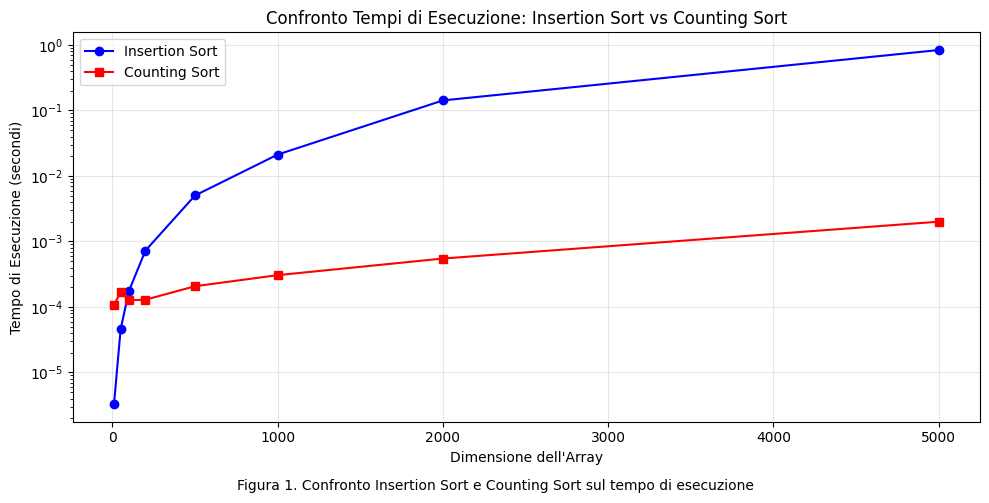

In [ ]:
# creazione figura e asse
fig1, ax1 = plt.subplots(figsize=(10, 5))

# impostazioni del tracciamento
ax1.plot(sizes, times_insertion, 'b-o', linestyle='-', label='Insertion Sort')
ax1.plot(sizes, times_counting, 'r-s', linestyle='-', label='Counting Sort')

# impostazioni degli assi e delle etichette
ax1.set_xlabel("Dimensione dell'Array")
ax1.set_ylabel("Tempo di Esecuzione (secondi)")
ax1.set_title("Confronto Tempi di Esecuzione: Insertion Sort vs Counting Sort")
ax1.set_yscale('log')
ax1.legend()
ax1.grid(True, alpha=0.3)

# didascalia
fig1.text(0.5, 0.01,
          "Figura 1. Confronto Insertion Sort e Counting Sort sul tempo di esecuzione",
          ha='center', fontsize=10, wrap=True)

fig1.tight_layout(rect=[0, 0.03, 1, 1])

plt.show()

#Confronto per Memoria Utilizzata
Come menzionato, il Counting Sort ha una complessità temporale lineare, che lo rende molto veloce. Tuttavia, questo vantaggio ha un costo in termini di memoria. La sua complessità spaziale dipende dal valore massimo (k) presente nell'array, il che può portare a un consumo di memoria significativo se i valori sono molto grandi.\
Per analizzare l'utilizzo della memoria, possiamo usare il pacchetto `tracemalloc`. Questa libreria Python permette di tracciare l'allocazione di memoria durante l'esecuzione.\
La funzione `measure_memory_usage` prende in ingresso due paramentri: `func`, la funzione che vogliamo misurare (come ad esempio `insertion_sort` o `counting_sort`), mentre `*args` saranno gli argomenti da passare a `func`.




In [ ]:
def measure_memory_usage(func, *args):
    tracemalloc.start()

    # eseguo la funzione
    func(*args)

    # acquisisco statistiche di memoria
    _,peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    return peak

Adesso andreamo a fare due esperimenti distinti per dimostrare come la complessità spaziale influisce sull'uso reale della memoria. Per prima cosa vado a fare il setup iniziale con il valori di n (`sizes`) e k (`k_values`), per vedere come scala la memoria al variare della grandezza dell'array e al variare del valore massimo nell'array.

In [ ]:
sizes = [100, 500, 1000, 2000, 5000]
k_values = [100, 500, 1000, 2000, 5000]

#TEST 1: Memoria vs Dimensione Array (k fisso)
In questo test l'obiettivo è quello di dimostrare che quando **k** è **costante**:
* **Insertion Sort**: memoria rimane $O(1)$ (costante)
* **Counting Sort**: memoria cresce $O(n)$ (linearmente con la dimensione)

Definiamo il valore fisso di k che deve mantenere in questo test ed inizializziamo le liste per il tracciamento dell'utilizzo della memoria:

In [ ]:
k_fixed = 1000
memory_insertion_vs_n = []
memory_counting_vs_n = []

Misuriamo ora il massimo utilizzo di memoria dei due algoritmi:

In [ ]:
for size in sizes:
    # array di test
    test_array = [random.randint(0, k_fixed) for _ in range(size)]

    # misura memoria Insertion Sort
    mem_insertion = measure_memory_usage(insertion_sort, test_array.copy())
    memory_insertion_vs_n.append(mem_insertion / 1024)  # Conversione in KB

    # misura memoria Counting Sort
    mem_counting = measure_memory_usage(counting_sort, test_array.copy(), k_fixed)
    memory_counting_vs_n.append(mem_counting / 1024)  # Conversione in KB

Infine riportiamo i risultati ottenuti in tabella:

In [ ]:
# DataFrame con i risultati
df_memory_results = pd.DataFrame({
    "Dimensione Array (n)": sizes,
    "Memoria Insertion Sort (KB)": memory_insertion_vs_n,
    "Memoria Counting Sort (KB)": memory_counting_vs_n,
    "Rapporto Counting/Insertion": [mc/mi for mi, mc in zip(memory_insertion_vs_n, memory_counting_vs_n)]
})

df_memory_styled = (
    df_memory_results.style
    .hide(axis="index")
    .format({
        "Memoria Insertion Sort (KB)": "{:.2f}",
        "Memoria Counting Sort (KB)": "{:.2f}",
        "Rapporto Counting/Insertion": "{:.0%}"
    })
    .set_properties(**{'text-align': 'center'})
)

df_memory_styled

Dimensione Array (n),Memoria Insertion Sort (KB),Memoria Counting Sort (KB),Rapporto Counting/Insertion
100,0.09,8.73,9308%
500,0.15,26.22,17213%
1000,0.15,39.07,25644%
2000,0.15,51.29,33664%
5000,0.15,76.88,50464%


#TEST 2: Memoria vs Valore k (n fisso)
In questo test l'obiettivo è quello di dimostrare che quando **n** è **costante**:
* Insertion Sort: memoria rimane $O(1)$ (non dipende da k)
* Counting Sort: memoria cresce $O(k)$ (linearmente con il range)

A differenza del [TEST 1](https://colab.research.google.com/drive/1Jt6_dLs0hACP3DSmhL77PeNUZ_UY8eAJ#scrollTo=CLn99skAtGHM) , in questo test andremo a mantenere fisso il valore di n, in modo da analizzare i comportamenti dei due algoritmi presi in considerazione al variare del range di k:



In [ ]:
n_fixed = 1000
memory_insertion_vs_k = []
memory_counting_vs_k = []

Adesso misuriamo il massimo utilizzo della memoria:

In [ ]:
for k in k_values:
    # array di test
    test_array = [random.randint(0, k) for _ in range(n_fixed)]

    # misura memoria Insertion Sort
    mem_insertion = measure_memory_usage(insertion_sort, test_array.copy())
    memory_insertion_vs_k.append(mem_insertion / 1024)

    # misura memoria Counting Sort
    mem_counting = measure_memory_usage(counting_sort, test_array.copy(), k)
    memory_counting_vs_k.append(mem_counting / 1024)

Infine riportiamo i risultati ottenuti in tabella:

In [ ]:
# DataFrame con i risultati
df_memory_vs_k = pd.DataFrame({
    "Valore K": k_values,
    "Memoria Insertion Sort (KB)": memory_insertion_vs_k,
    "Memoria Counting Sort (KB)": memory_counting_vs_k,
    "Rapporto Counting/Insertion": [mc/mi for mi, mc in zip(memory_insertion_vs_k, memory_counting_vs_k)]
})

df_memory_vs_k_styled = (
    df_memory_vs_k.style
    .hide(axis="index")
    .format({
        "Memoria Insertion Sort (KB)": "{:.2f}",
        "Memoria Counting Sort (KB)": "{:.2f}",
        "Rapporto Counting/Insertion": "{:.0%}"
    })
    .set_properties(**{'text-align': 'center'})
)

df_memory_vs_k_styled

Valore K,Memoria Insertion Sort (KB),Memoria Counting Sort (KB),Rapporto Counting/Insertion
100,1.49,11.19,751%
500,0.15,23.66,15531%
1000,0.15,39.60,25992%
2000,0.15,69.72,45767%
5000,0.15,165.22,108454%


#Rappresentazione grafica memoria utilizzata
Come per il tempo di utilizzo, utilizziamo anche qua dei grafici per visualizzare e confrontare le performance dei due test. Analogamente useremo la libreria `matplotlib` per creare la rappresentazione grafica che metta in relazione l'utilizzo della memoria in base alla dimensione dell'array e al variare di k.

# Memoria vs Dimensione Array

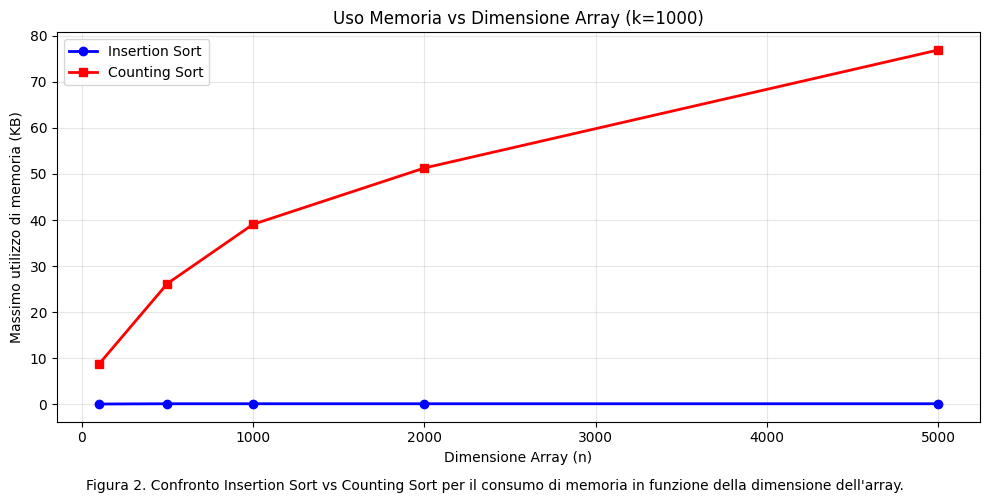

In [ ]:
# creazione figura e asse
fig2, ax2 = plt.subplots(figsize=(10, 5))

# impostazioni del tracciamento
ax2.plot(sizes, memory_insertion_vs_n, 'b-o', label='Insertion Sort', linewidth=2)
ax2.plot(sizes, memory_counting_vs_n, 'r-s', label='Counting Sort', linewidth=2)

# impostazioni degli assi e delle etichette
ax2.set_xlabel('Dimensione Array (n)')
ax2.set_ylabel('Massimo utilizzo di memoria (KB)')
ax2.set_title('Uso Memoria vs Dimensione Array (k=1000)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# didascalia
fig2.text(0.5, 0.01,
          "Figura 2. Confronto Insertion Sort vs Counting Sort per il consumo di memoria in funzione della dimensione dell'array.",
          ha='center', fontsize=10, wrap=True)

fig2.tight_layout(rect=[0, 0.03, 1, 1])

plt.show()

# Memoria vs Valore k

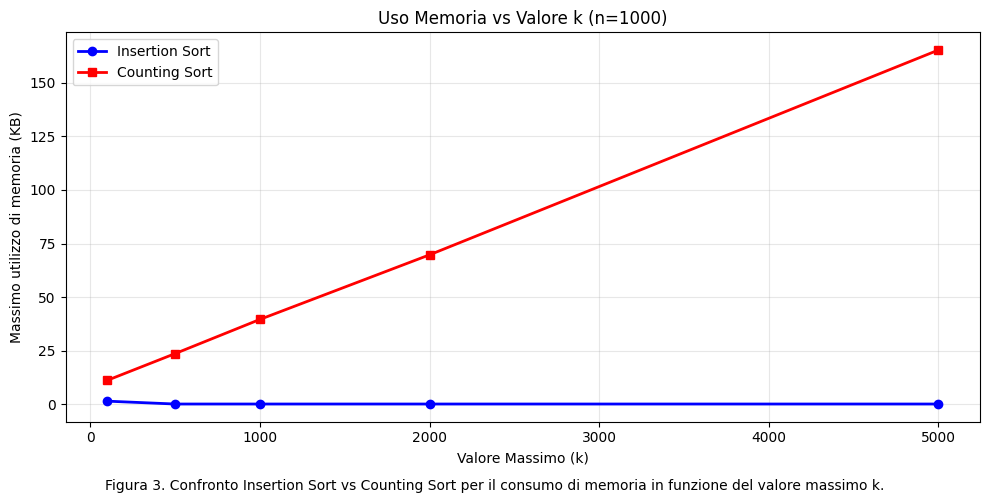

In [ ]:
# creazione figura e asse
fig3, ax3 = plt.subplots(figsize=(10, 5))

# impostazioni del tracciamento
ax3.plot(k_values, memory_insertion_vs_k, 'b-o', label='Insertion Sort', linewidth=2)
ax3.plot(k_values, memory_counting_vs_k, 'r-s', label='Counting Sort', linewidth=2)

# impostazioni degli assi e delle etichette
ax3.set_xlabel('Valore Massimo (k)')
ax3.set_ylabel('Massimo utilizzo di memoria (KB)')
ax3.set_title('Uso Memoria vs Valore k (n=1000)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# didascalia
fig3.text(0.5, 0.01,
          "Figura 3. Confronto Insertion Sort vs Counting Sort per il consumo di memoria in funzione del valore massimo k.",
          ha='center', fontsize=10, wrap=True)

fig3.tight_layout(rect=[0, 0.03, 1, 1])

plt.show()



#Conclusioni
Analizzando i risultati ottenuti, possiamo trarre le seguenti conclusioni:
* **Tempo di Esecuzione**: Il [grafico dei tempi di esecuzione](https://colab.research.google.com/drive/1Jt6_dLs0hACP3DSmhL77PeNUZ_UY8eAJ#scrollTo=MMWqGA2VJdBW&line=6&uniqifier=1) mostra chiaramente che il Counting Sort è significativamente più veloce dell'Insertion Sort, specialmente all'aumentare della dimensione dell'array. La curva dell'Insertion Sort cresce in modo quadratico, mentre quella del Counting Sort rimane molto più piatta, confermando la sua complessità temporale lineare.
* **Utilizzo della Memoria**: L'analisi con `tracemalloc` evidenzia il principale svantaggio del Counting Sort. Mentre l'Insertion Sort opera "in-place" e il suo consumo di memoria è minimo e costante. Poiché il Counting Sort alloca un array ausiliario la cui dimensione è proporzionale al valore massimo nell'input, porta di conseguenza ad un consumo di memoria molto elevato e impraticabile se l'intervallo dei valori (k) è grande (come si può notare nei grafici del [TEST 1](https://colab.research.google.com/drive/1Jt6_dLs0hACP3DSmhL77PeNUZ_UY8eAJ#scrollTo=CJhgm1X3830X&line=1&uniqifier=1) e [TEST 2](https://colab.research.google.com/drive/1Jt6_dLs0hACP3DSmhL77PeNUZ_UY8eAJ#scrollTo=My-h8s7qAB5e&line=1&uniqifier=1)).

Quindi la scelta tra i due algoritmi dipende dalle caratteristiche dei dati:
* **Insertion Sort** è una buona scelta per insiemi di dati piccoli o quasi ordinati, dove la sua semplicità e il basso consumo di memoria sono vantaggiosi.
* **Counting Sort** è estremamente efficiente per ordinare grandi array di interi con un intervallo di valori relativamente piccolo, dove la sua velocità lineare supera di gran lunga il costo della memoria aggiuntiva.

----------
#Riferimenti
[1] Thomas H. Cormen, Charles E. Leiserson, Ronald L. Rivest, Clifford Stein (2009) Introduzione
agli algoritmi e strutture dati Terza edizione, McGraw Hill.\
[2] Funzione [zip()](https://www.w3schools.com/python/ref_func_zip.asp)\
[3] Funzione [timeit.timeit()](https://docs.python.org/3/library/timeit.html#timeit.timeit)\
[4] Funzione [random.randint()](https://docs.python.org/3/library/random.html)\
[5] Libreria [tracemalloc](https://docs.python.org/3/library/tracemalloc.html)\
[6] Rappresentazione tabulare attraverso [pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)\
[7] Rappresentazione grafica attraverso [matplotlib](https://matplotlib.org/stable/plot_types/basic/plot.html#sphx-glr-plot-types-basic-plot-py)

